In [1]:
import os
os.environ['KAGGLE_CONFIG_DIR'] ='/content'
!kaggle datasets download -d erdemtaha/cancer-data
!unzip \*.zip && rm *.zip

  0% 0.00/48.6k [00:00<?, ?B/s]
100% 48.6k/48.6k [00:00<00:00, 39.4MB/s]
Archive:  cancer-data.zip
  inflating: Cancer_Data.csv         


In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Step 1: Load Data
data = pd.read_csv('/content/Cancer_Data.csv')  # Replace '/path/to/your/dataset.csv' with the actual path

# Step 2: Prepare Data
X = data[['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
          'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean']]
y = data['diagnosis']  # Target variable

# Step 3: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 5: Define Generalized Mean Distance function
def gmd(x1, x2, p):
    return np.power(np.mean(np.power(np.abs(x1 - x2), p)), 1/p)

# Step 6: Implement GMD-KNN algorithm
def gmd_knn(X_train, y_train, X_test, k, p):
    y_pred = []
    for x_test_point in X_test:
        distances = [gmd(x_test_point, x_train, p) for x_train in X_train]
        nearest_indices = np.argsort(distances)[:k]  # Indices of k-nearest neighbors
        nearest_labels = y_train.iloc[nearest_indices]
        pred_label = nearest_labels.mode()[0]  # Majority vote
        y_pred.append(pred_label)
    return y_pred

# Step 7: Apply GMD-KNN
k = 5  # Number of neighbors
p = 2  # Generalized mean parameter (2 for Euclidean distance)
y_pred = gmd_knn(X_train_scaled, y_train, X_test_scaled, k, p)

# Step 8: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Display evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Display classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9385964912280702
Precision: 0.9390179995443153
Recall: 0.9385964912280702
F1 Score: 0.9387316420177368

Classification Report:
               precision    recall  f1-score   support

           B       0.96      0.94      0.95        71
           M       0.91      0.93      0.92        43

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.93       114
weighted avg       0.94      0.94      0.94       114



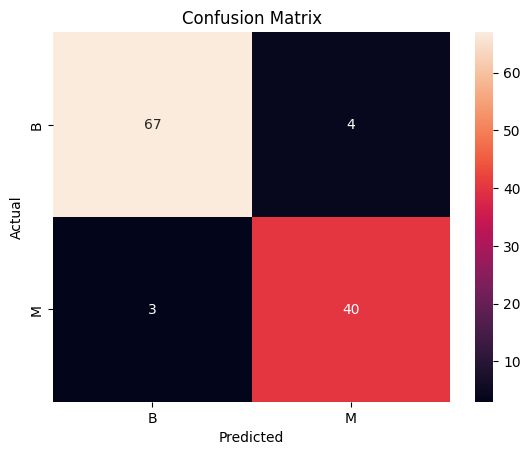

In [3]:
# Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

conf_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(conf_matrix, annot=True, fmt='g')
plt.title('Confusion Matrix')
plt.show()